In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data=pd.read_csv('/content/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [6]:
data.shape

(100000, 9)

In [7]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [8]:
data['gender']=data['gender'].map({'Female':1,'Male':2,'Other':0})

In [9]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [10]:
data['smoking_history']=data['smoking_history'].map({'never':1,'No Info':2,'current':3,'former':4,'not current':5})

In [11]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,95996.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.414120,41.885856,0.07485,0.039420,2.127464,27.320767,5.527507,138.058060,0.085000
std,0.492937,22.516840,0.26315,0.194593,1.200085,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,1.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,1.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,2.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,60.000000,0.00000,0.000000,3.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
data.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030061,0.014517,0.077933,0.064553,-0.023009,0.020086,0.017165,0.037752
age,-0.030061,1.000000,0.251171,0.233354,0.133874,0.337396,0.101354,0.110672,0.258008
hypertension,0.014517,0.251171,1.000000,0.121262,0.028998,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077933,0.233354,0.121262,1.000000,0.070156,0.061198,0.067589,0.070066,0.171727
smoking_history,0.064553,0.133874,0.028998,0.070156,1.000000,0.057081,0.022495,0.024214,0.057342
bmi,-0.023009,0.337396,0.147666,0.061198,0.057081,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.020086,0.101354,0.080939,0.067589,0.022495,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017165,0.110672,0.084429,0.070066,0.024214,0.091261,0.166733,1.000000,0.419558
diabetes,0.037752,0.258008,0.197823,0.171727,0.057342,0.214357,0.400660,0.419558,1.000000


In [13]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,4004
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


<Axes: >

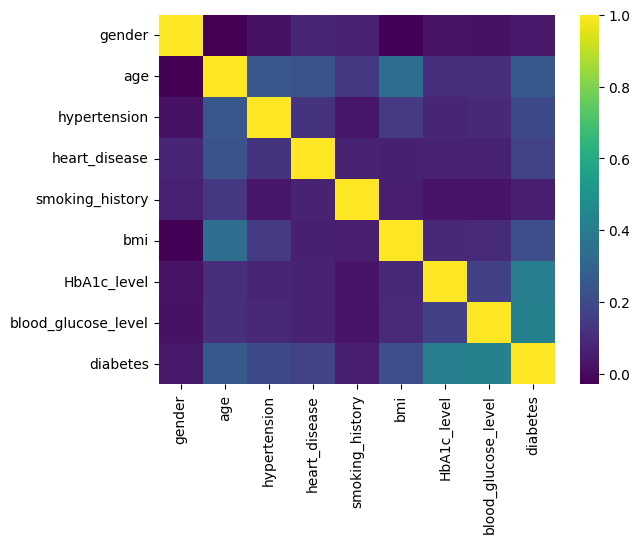

In [14]:
sns.heatmap(data.corr(),cmap='viridis')

<Axes: >

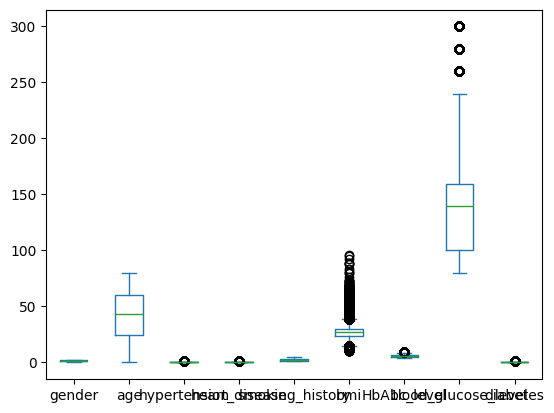

In [15]:
data.plot(kind='box')

In [16]:
y=data['diabetes']
data.drop('diabetes',axis=1,inplace=True)
x=data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
x_test.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
x_train = imputer.fit_transform(x_train) # Fit and transform on training data
x_test = imputer.transform(x_test)
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.94825

In [25]:
confusion_matrix(y_test,y_pred)

array([[18052,   287],
       [  748,   913]])